In [1]:
pip install scikit-learn pandas matplotlib seaborn shap numpy

In [46]:
# Импорт основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Подключение библиотек scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Настройки отображения
%matplotlib inline
sns.set(style="whitegrid")

In [4]:
!unzip /content/IoT_Intrusion.csv.zip

Archive:  /content/IoT_Intrusion.csv.zip
  inflating: IoT_Intrusion.csv       


In [47]:
df = pd.read_csv("/content/IoT_Intrusion.csv.zip")
# Удаление пропущенных значений
df.dropna(inplace=True)

In [48]:
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.763553e+00,7.759537e+04,9.062979e+00,6.635523e+01,9.146945e+03,9.146945e+03,1.807621e-06,8.655842e-02,2.073090e-01,9.057149e-02,...,1.248502e+02,3.345817e+01,1.248978e+02,8.317382e+07,9.497998e+00,1.312711e+01,4.728151e+01,3.147998e+04,9.635824e-02,1.414999e+02
std,2.965660e+02,4.664043e+05,8.936737e+00,1.408680e+01,9.974794e+04,9.974794e+04,8.501385e-04,2.811870e-01,4.053790e-01,2.869989e-01,...,2.420296e+02,1.622552e+02,2.429223e+02,1.703857e+07,8.187710e-01,8.639921e+00,2.294819e+02,3.645895e+05,2.327718e-01,2.105725e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.087155e+00,2.087155e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.581371e+01,1.581371e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,1.042881e-01,2.781200e+02,1.428000e+01,6.400000e+01,1.174380e+02,1.174380e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.405208e+01,3.777740e-01,5.406000e+01,8.334390e+07,9.500000e+00,1.039675e+01,5.059213e-01,1.370916e+00,8.000000e-02,1.415500e+02
max,9.943576e+04,9.815555e+06,4.700000e+01,2.550000e+02,7.340032e+06,7.340032e+06,8.484654e-01,1.000000e+00,1.000000e+00,1.000000e+00,...,8.040961e+03,1.099626e+04,1.309800e+04,1.676394e+08,1.500000e+01,1.252094e+02,1.555106e+04,1.372844e+08,1.000000e+00,2.446000e+02


In [49]:
# Определение констант
MIRAI_TYPES = ['Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood']
RANDOM_STATE = 42

In [50]:
class_distribution = df['label'].value_counts()
class_distribution

,count
label,
DDoS-ICMP_Flood,161281
DDoS-UDP_Flood,121205
DDoS-TCP_Flood,101293
DDoS-PSHACK_Flood,92395
DDoS-SYN_Flood,91644
DDoS-RSTFINFlood,90823
DDoS-SynonymousIP_Flood,80680
DoS-UDP_Flood,74787
DoS-TCP_Flood,59807


In [51]:
# Проверка наличия пропущенных значений
missing_values = df.isnull().sum().sum()
missing_values

np.int64(0)

In [52]:
# Подсчет и вывод кол-ва атак Mirai
mirai_count = df[df['label'].isin(MIRAI_TYPES)].shape[0]
mirai_count

59233

In [53]:
# Распределение атак Mirai по типам
mirai_distribution = df[df['label'].isin(MIRAI_TYPES)]['label'].value_counts()
mirai_distribution

,count
label,
Mirai-greeth_flood,22115
Mirai-udpplain,20166
Mirai-greip_flood,16952


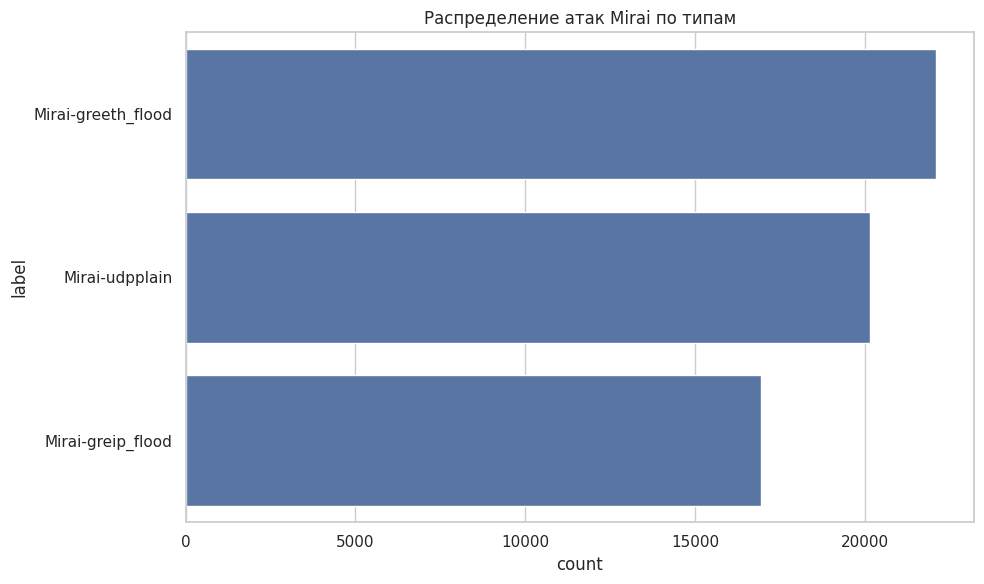

In [54]:
# Визуализация распределения типов Mirai
plt.figure(figsize=(10, 6))
sns.countplot(y=df[df['label'].isin(MIRAI_TYPES)]['label'])
plt.title('Распределение атак Mirai по типам')
plt.tight_layout()
plt.show('mirai_distribution.png')
plt.close()

In [91]:
# Создание бинарной метки (Mirai или нет)
df['is_mirai'] = df['label'].apply(lambda x: 1 if x in MIRAI_TYPES else 0)

# Создание меток для конкретных типов Mirai (multiclass)
df['mirai_type'] = df['label'].apply(lambda x: x if x in MIRAI_TYPES else 'not_mirai')

# Разделение на признаки и целевые переменные
X = df.drop(['label', 'is_mirai', 'mirai_type'], axis=1)
y_binary = df['is_mirai']  # Для бинарной классификации
y_multiclass = df['mirai_type']  # Для многоклассовой классификации

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train_binary, y_test_binary = train_test_split(
    X_scaled, y_binary, test_size=0.3, random_state=RANDOM_STATE, stratify=y_binary
)

print(X_train.shape)
print(X_test.shape)

(734002, 46)
(314573, 46)


In [92]:
clf = RandomForestClassifier(random_state=RANDOM_STATE)
# grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=1)
clf.fit(X_train, y_train_binary)

# print(f"Лучшие параметры: {grid_search.best_params_}")
# print(f"Лучшая точность при кросс-валидации: {grid_search.best_score_:.4f}")

RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

       mirai       1.00      1.00      1.00    296803
      others       1.00      1.00      1.00     17770

    accuracy                           1.00    314573
   macro avg       1.00      1.00      1.00    314573
weighted avg       1.00      1.00      1.00    314573



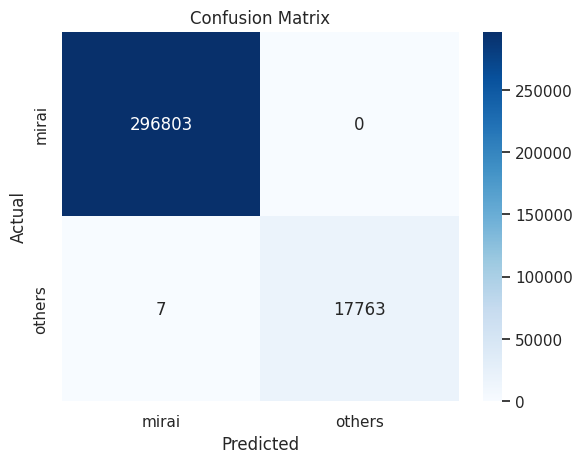

In [108]:
y_pred = clf.predict(X_test)

# Отчёт классификации
print("Classification Report:\n", classification_report(y_test_binary, y_pred, target_names=['mirai', 'others'], zero_division=0))

# Матрица ошибок
conf_mat = confusion_matrix(y_test_binary, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['mirai', 'others'], yticklabels=['mirai', 'others'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

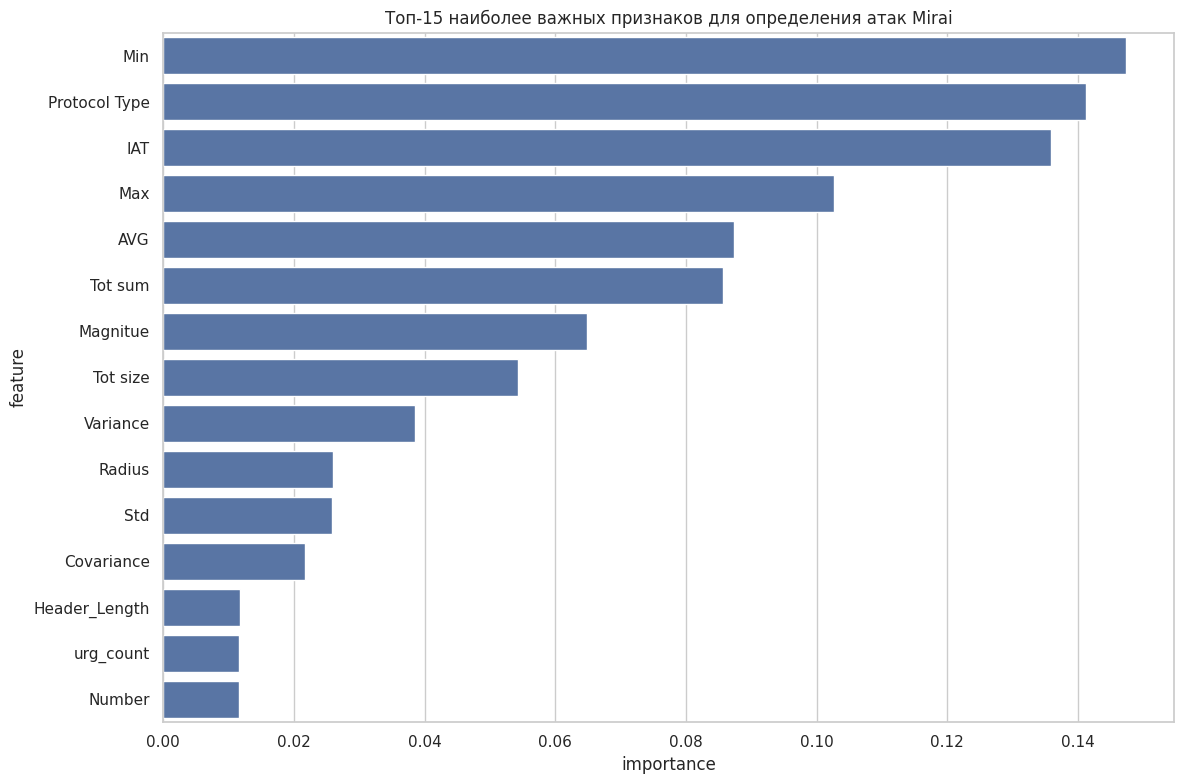

Топ-10 важных признаков:
          feature  importance
34            Min    0.147334
2   Protocol Type    0.141281
39            IAT    0.135869
35            Max    0.102646
36            AVG    0.087394
33        Tot sum    0.085605
41       Magnitue    0.064944
38       Tot size    0.054233
44       Variance    0.038484
42         Radius    0.026034


In [109]:
feature_names = X.columns
feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': clf.feature_importances_
    }).sort_values('importance', ascending=False)

# Отображение топ-15 признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Топ-15 наиболее важных признаков для определения атак Mirai')
plt.tight_layout()
plt.show('mirai_feature_importance.png')
plt.close()

print("Топ-10 важных признаков:")
print(feature_importance.head(10))

In [110]:
np.where(y_test_binary == 1)

(array([     5,     22,     23, ..., 314481, 314490, 314498]),)

In [129]:
# Выбор подмножества тестовых данных для анализа SHAP (для ускорения)
# Используем не более 1000 примеров для SHAP, чтобы не перегружать память

mirai_idx_all = np.where(y_test_binary == 1)[0]
others_idx_all = np.where(y_test_binary == 0)[0]

target_mirai = 180
target_others = 3000

mirai_idx = np.random.choice(mirai_idx_all, size=target_mirai, replace=False)
others_idx = np.random.choice(others_idx_all, size=target_others, replace=False)

idx = np.concatenate([mirai_idx, others_idx])
np.random.shuffle(idx)

X_sample = X_test[idx]
y_sample = y_test_binary.iloc[idx]


print(X_sample.shape)
# X_sample = X_test[:2000]

# Создание SHAP explainer для модели Random Forest
explainer = shap.TreeExplainer(clf, feature_perturbation="interventional", feature_names=feature_names)
shap_values = explainer.shap_values(X_sample, y_sample)

(3180, 46)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:253: FutureWarning: In the future, passing feature_perturbation='interventional' without providing a background dataset will raise an error. Please provide a background dataset to continue using the interventional approach or set feature_perturbation='auto' to automatically switch approaches.
  warnings.warn(


In [137]:
print(shap_values[0])

[[ 1.33579196e-04 -1.33579196e-04]
 [ 4.96802307e-04 -4.96802307e-04]
 [ 1.06394123e-02 -1.06394123e-02]
 [ 1.02718453e-04 -1.02718453e-04]
 [ 1.19293797e-05 -1.19293797e-05]
 [ 1.49672270e-04 -1.49672270e-04]
 [ 0.00000000e+00  0.00000000e+00]
 [-1.55626835e-07  1.55626835e-07]
 [ 1.01651423e-03 -1.01651423e-03]
 [-3.27344050e-07  3.27344050e-07]
 [-1.28100357e-06  1.28100357e-06]
 [-2.25414377e-04  2.25414377e-04]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 4.61247945e-06 -4.61247945e-06]
 [ 1.49406465e-03 -1.49406465e-03]
 [-4.63959117e-05  4.63959117e-05]
 [-3.45550075e-04  3.45550075e-04]
 [-4.91363309e-04  4.91363309e-04]
 [-1.11158263e-06  1.11158263e-06]
 [-9.59676823e-05  9.59676823e-05]
 [ 1.08329873e-05 -1.08329873e-05]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-2.16917311e-10  2.16917311e-10]
 [ 0.00000000e+00  0.00000000e+00]
 [ 4.01242345e-03 -4.01242345e-03]
 [ 2.25053443e-04 -2.25053443e-04]
 [ 0.00000000e+00  0

SHAP Summary Plot: влияние признаков на предсказание атак Mirai


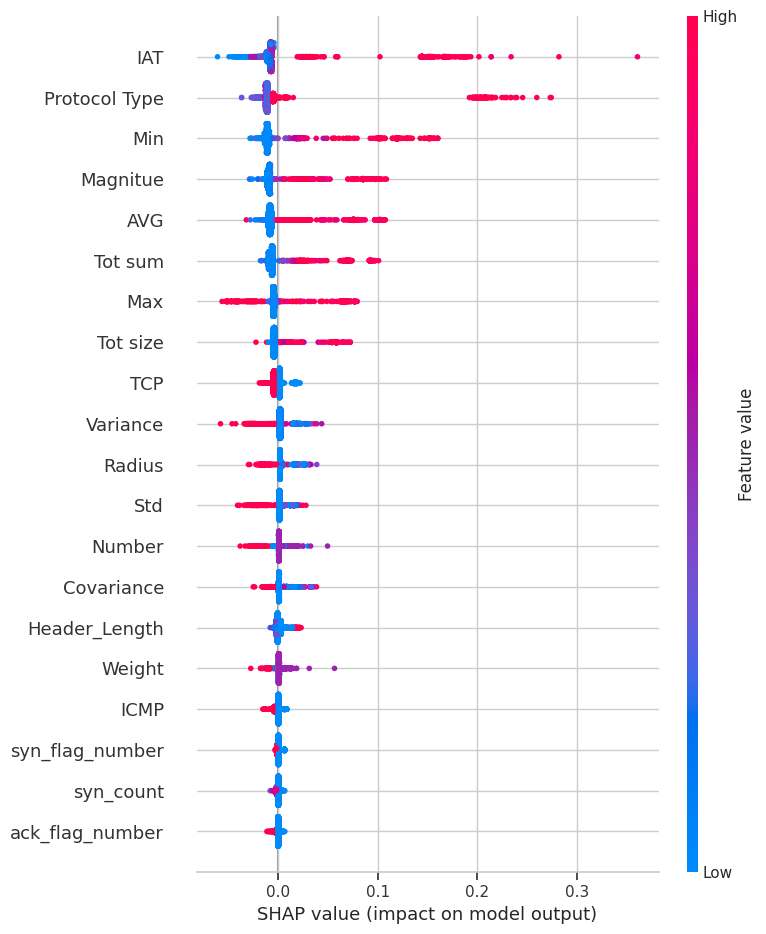

In [139]:
shap_values_shaped = shap_values[:, :, 1]
print('SHAP Summary Plot: влияние признаков на предсказание атак Mirai')
shap.summary_plot(shap_values_shaped, X_sample, feature_names=feature_names)

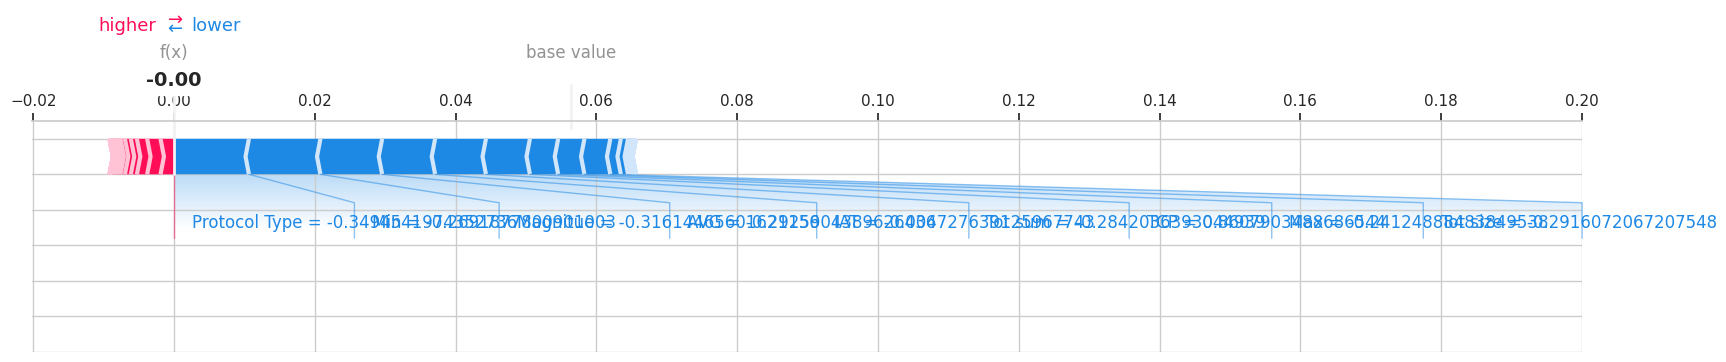

In [158]:

# Для старой версии, если требуется force plot:
shap.initjs()
shap.force_plot(
    expected_value,
    s[0],       # s[0, :] - shap values для первой строки
    X_plot[0],  # признаки той же строки
    feature_names=f,
    matplotlib=True
)



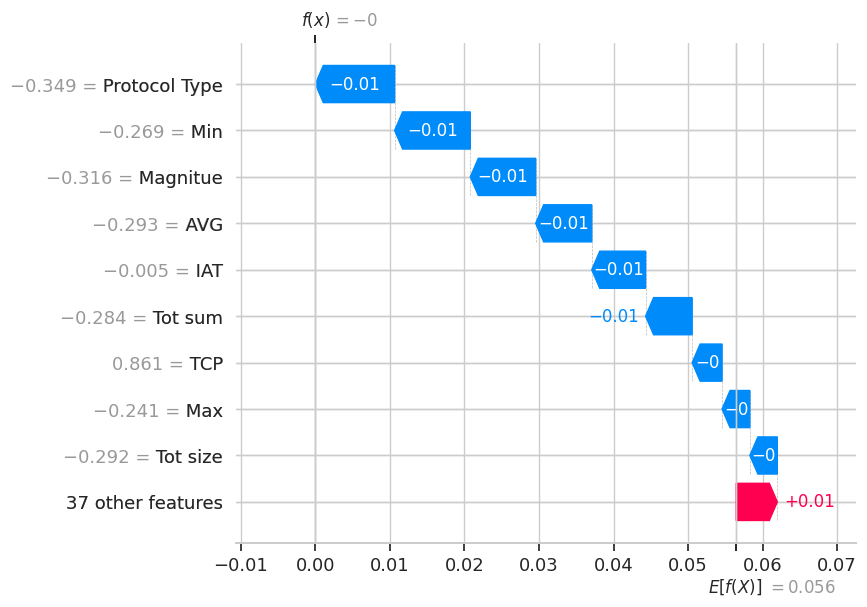

In [166]:
shap.plots.waterfall(
    shap.Explanation(
        values=shap_explanation[0].values[:, 1],     # важность для второго класса
        base_values=shap_explanation[0].base_values[1],  # базовое значение для второго класса
        data=shap_explanation[0].data,
        feature_names=shap_explanation.feature_names
    )
)



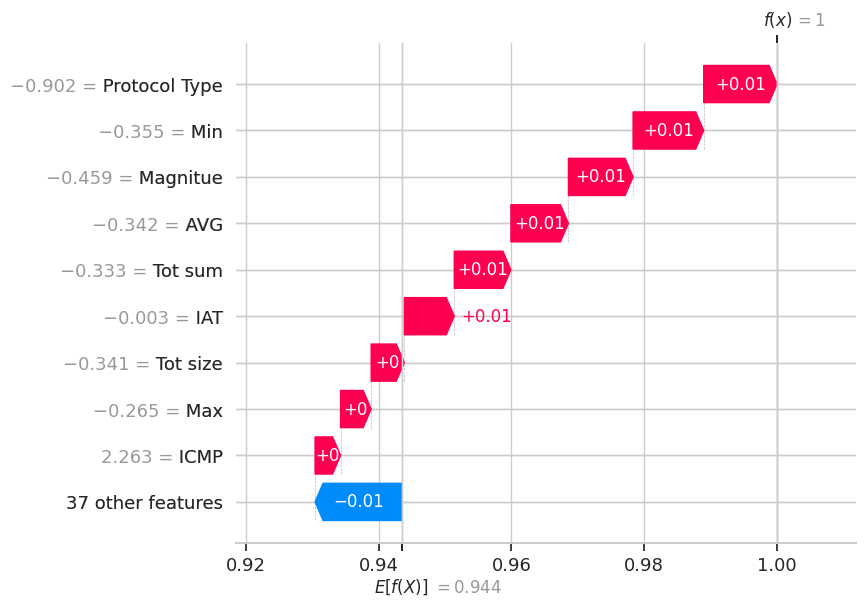

In [171]:
shap.plots.waterfall(
    shap.Explanation(
        values=shap_explanation[0].values[:, 0],
        base_values=shap_explanation[0].base_values[0],
        data=shap_explanation[0].data,
        feature_names=shap_explanation.feature_names
    )
)




In [ ]:
# 3. Вычисление и отображение SHAP взаимодействий между признаками
print("\nАнализ взаимодействий между признаками:")
try:
    # Выбираем меньшее количество примеров для анализа взаимодействий (это вычислительно сложно)
    interaction_sample = X_sample[:200]
    interaction_values = explainer.shap_interaction_values(interaction_sample)

    if isinstance(interaction_values, list):
        interaction_values = interaction_values[1]  # Для многоклассовой - берем значения для класса 1 (Mirai)

    # Получение наиболее сильных взаимодействий
    interaction_sum = np.abs(interaction_values).sum(0).sum(0)
    top_interaction_indices = np.argsort(interaction_sum)[-5:]  # топ-5 признаков с сильнейшими взаимодействиями

    for idx in top_interaction_indices:
        # Находим признак, с которым самое сильное взаимодействие
        interaction_with_idx = np.abs(interaction_values)[:, idx, :].sum(0)
        interaction_with_idx[idx] = 0  # исключаем взаимодействие с самим собой
        strongest_interaction_idx = np.argmax(interaction_with_idx)

        plt.figure(figsize=(10, 8))
        shap.dependence_plot(
            (idx, strongest_interaction_idx),
            interaction_values,
            interaction_sample,
            feature_names=feature_names,
            show=False
        )
        plt.title(f'SHAP Interaction Plot: {feature_names[idx]} и {feature_names[strongest_interaction_idx]}')
        plt.tight_layout()
        plt.show(f'shap_interaction_{feature_names[idx]}_{feature_names[strongest_interaction_idx]}.png')
        plt.close()

        print(f"- Сильное взаимодействие между {feature_names[idx]} и {feature_names[strongest_interaction_idx]}")
except Exception as e:
    print(f"Не удалось вычислить взаимодействия: {e}")

# 4. Force plot - объяснение предсказаний для конкретных примеров
# Выбираем несколько интересных примеров (например, правильно и неправильно классифицированные)
plt.figure(figsize=(20, 6))
shap.initjs()  # инициализация JavaScript-визуализации

# Сохраняем force plot в HTML-файл для интерактивного исследования
force_plot = shap.force_plot(explainer.expected_value, shap_values[:10],
                              X_sample[:10], feature_names=feature_names)
shap.save_html("shap_force_plot.html", force_plot)

print("\nSHAP Force Plot сохранен в файл shap_force_plot.html для интерактивного просмотра")



# 6. Создаем датафрейм с SHAP values для дальнейшего анализа
shap_df = pd.DataFrame(shap_values, columns=feature_names)
shap_df.to_csv('shap_values.csv', index=False)

print("\nSHAP values сохранены в файл shap_values.csv для дальнейшего анализа")